# 📘 TITANIC MODEL
# -----------------------------------------------------
# Import thư viện

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------------------------------
# 1️⃣ Đọc dữ liệu

In [27]:
train = pd.read_csv("data/train.csv")

# Bỏ cột không cần thiết (Cabin, PassengerId, Name, Ticket)
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

display (train.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# -----------------------------------------------------
# 2️⃣ Xử lý dữ liệu thiếu

In [17]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

C:\Users\HOME\AppData\Local\Temp\ipykernel_11140\648336700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\HOME\AppData\Local\Temp\ipykernel_11140\648336700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

# -----------------------------------------------------
# 3️⃣ Mã hóa biến phân loại

In [18]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])

# -----------------------------------------------------
# 4️⃣ Chuẩn hóa dữ liệu số

In [19]:
scaler = StandardScaler()
num_cols = ['Age', 'Fare']
train[num_cols] = scaler.fit_transform(train[num_cols])

# -----------------------------------------------------
# 5️⃣ Chia tập train/test

In [20]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------------------
# 6️⃣ Huấn luyện mô hình Random Forest

In [21]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# -----------------------------------------------------
# 7️⃣ Dự đoán & đánh giá

In [22]:
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("🎯 Độ chính xác:", round(acc * 100, 2), "%")
print("\n📋 Báo cáo phân loại:\n", classification_report(y_test, y_pred))

🎯 Độ chính xác: 81.56 %

📋 Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



# -----------------------------------------------------
# 8️⃣ Ma trận nhầm lẫn

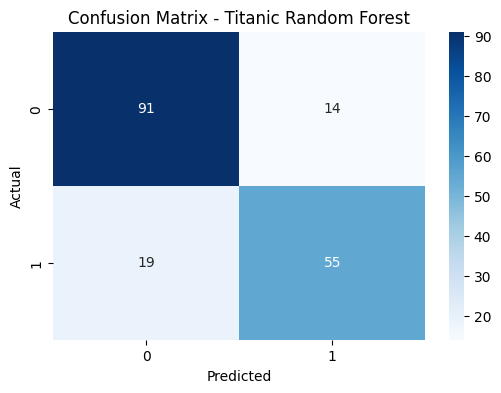

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Titanic Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -----------------------------------------------------
# 9️⃣ Quan trọng đặc trưng (Feature Importance)

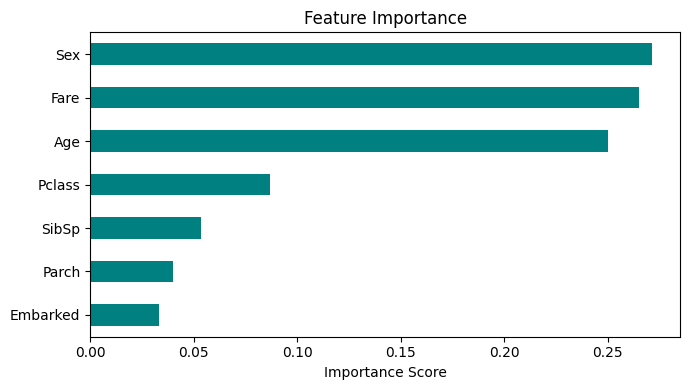


✅ Đã hoàn tất mô hình Titanic (bỏ Cabin, giữ nguyên pipeline)


In [24]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', color='teal', figsize=(7, 4))
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\n✅ Đã hoàn tất mô hình Titanic (bỏ Cabin, giữ nguyên pipeline)")